# House Price Prediction - Advanced regression Assignment

#### Data Understanding
#### Data Cleaning
#### Data Preparation
#### Model Building
#### Observation and Summary

In [2]:
#importing all needed imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#check for null values presence
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#Check percentage of null values and sort
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#missing_value_df.sort_values(by = 'percent_missing',ascending = False)
missing_value_df[missing_value_df['percent_missing']>0].sort_values(by = 'percent_missing',ascending = False)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageType,GarageType,5.547945
GarageYrBlt,GarageYrBlt,5.547945
GarageFinish,GarageFinish,5.547945
GarageQual,GarageQual,5.547945


PoolQC missing percentage is high and if we impute missing data then the data will be imbalanced so we can drop

In [7]:
#drop PoolQC
df.drop(['PoolQC'], axis=1, inplace=True)

### Impute missing Values for Categorical Columns

In [8]:
#Fill None for values Missing 
df['Alley'].fillna("None", inplace=True)
df['MiscFeature'].fillna("None", inplace=True)
df['Fence'].fillna("None", inplace=True)
df['GarageCond'].fillna("None", inplace=True)
df['GarageQual'].fillna("None", inplace=True)
df['GarageFinish'].fillna("None", inplace=True)
df['GarageType'].fillna("None", inplace=True)
df['FireplaceQu'].fillna("None", inplace=True)
df['BsmtFinType2'].fillna("None", inplace=True)
df['BsmtFinType1'].fillna("None", inplace=True)
df['BsmtExposure'].fillna("None", inplace=True)
df['BsmtCond'].fillna("None", inplace=True)
df['BsmtQual'].fillna("None", inplace=True)
df['MasVnrType'].fillna("None", inplace=True)

In [9]:
#Check percentage of null values and sort
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#missing_value_df.sort_values(by = 'percent_missing',ascending = False)
missing_value_df[missing_value_df['percent_missing']>0].sort_values(by = 'percent_missing',ascending = False)

,column_name,percent_missing
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
MasVnrArea,MasVnrArea,0.547945
Electrical,Electrical,0.068493


Electrical has only one record of missing data so we can drop that row

In [10]:
df.dropna(subset=['Electrical'], inplace=True)

### Impute Missing Values for numeric features 

In [11]:
#Check the feature description
df['LotFrontage'].describe()

count    1200.000000
mean       70.047500
std        24.294727
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
#LotFrontage is the linear feet from the street since this is not important feature we can impute median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'].describe()

count    1459.000000
mean       69.861549
std        22.035077
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
#Check the feature description
df['GarageYrBlt'].describe()

count    1378.000000
mean     1978.485486
std        24.686740
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [14]:
#GarageYrBlt The year garage was built.we can impute the median and check the result of change
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageYrBlt'].describe()

count    1459.000000
mean     1978.569568
std        23.993708
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [15]:
#Check the feature description
df['MasVnrArea'].describe()

count    1451.00000
mean      103.75672
std       181.10815
min         0.00000
25%         0.00000
50%         0.00000
75%       166.00000
max      1600.00000
Name: MasVnrArea, dtype: float64

In [16]:
#since MasVnrArea has very little NA percentage we can impute median for this as well
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrArea'].describe()

count    1459.000000
mean      103.187800
std       180.773158
min         0.000000
25%         0.000000
50%         0.000000
75%       164.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [17]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### Outlier Detection

In [18]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])
percentage_of_outliers={}

for feature in numeric_data.columns:
    IQR=numeric_data[feature].quantile(.75)-numeric_data[feature].quantile(.25)
    outliers_count=numeric_data[(numeric_data[feature]>(numeric_data[feature].quantile(.75)+1.5*IQR)) | (numeric_data[feature]<(numeric_data[feature].quantile(.25)-1.5*IQR))].shape[0]
    percentage_of_outliers[feature]=round(outliers_count/numeric_data.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(percentage_of_outliers.keys()),'Percentage':list(percentage_of_outliers.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.26
10,BsmtFinSF2,11.45
5,OverallCond,8.57
32,ScreenPorch,7.95
2,LotFrontage,7.27
1,MSSubClass,7.06
8,MasVnrArea,6.72
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.28
22,KitchenAbvGr,4.66


Observation : 
    Dropping of outliers will cause loss of information
    So we can fix the outlier with by reassingning Min and Max Values

In [19]:
for feature,percentage in percentage_of_outliers.items():
    if feature!='SalePrice':
        IQR = df[feature].quantile(.75) - df[feature].quantile(.25) 
        max_value = df[feature].quantile(.75)+1.5*IQR
        min_value = df[feature].quantile(.25)-1.5*IQR
        df[feature][df[feature] > max_value] = max_value
        df[feature][df[feature] < min_value ] = min_value

In [20]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.0,1459.0,1459.0,1459.0,1459.000000,1459.000000,1459.000000
mean,730.054832,55.068540,69.087731,9647.797807,6.101439,5.543866,1971.275531,1984.850583,89.509596,440.30209,0.0,563.900960,1050.721899,1157.302947,346.588074,0.0,1503.866861,0.425291,0.0,1.564770,0.382454,2.851611,1.0,6.487320,0.611720,1978.571967,1.765250,470.751542,91.801234,42.632625,0.0,0.0,0.0,0.0,0.0,6.322824,2007.815627,180930.394791
std,421.411181,37.515366,17.237514,3596.693722,1.378601,0.963921,30.104997,20.644343,134.143747,433.22393,0.0,431.832554,397.685738,362.577218,435.873361,0.0,481.676406,0.517431,0.0,0.550987,0.502798,0.759767,0.0,1.542386,0.638977,23.986020,0.742982,207.241765,116.697922,52.507724,0.0,0.0,0.0,0.0,0.0,2.704331,1.328542,79468.964025
min,1.000000,20.000000,31.500000,1468.000000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.00000,0.0,0.000000,42.250000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1903.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.00000,0.0,223.000000,796.000000,882.000000,0.000000,0.0,1129.000000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1962.000000,1.000000,333.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.00000,0.0,479.000000,992.000000,1088.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.50000,0.0,808.000000,1298.500000,1391.500000,728.000000,0.0,1777.500000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,107.500000,17684.000000,10.000000,7.500000,2010.000000,2010.000000,411.250000,1781.25000,0.0,1685.500000,2052.250000,2155.750000,1820.000000,0.0,2750.250000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,940.500000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


### Data Analysing
Analaysing the data with the sales price variable

In [21]:
def draw_plot(dataList):
    fig=plt.subplots(figsize=(18, 14))
    for i, data in enumerate(dataList):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot( df[data],df['SalePrice'])
        plt.tight_layout()

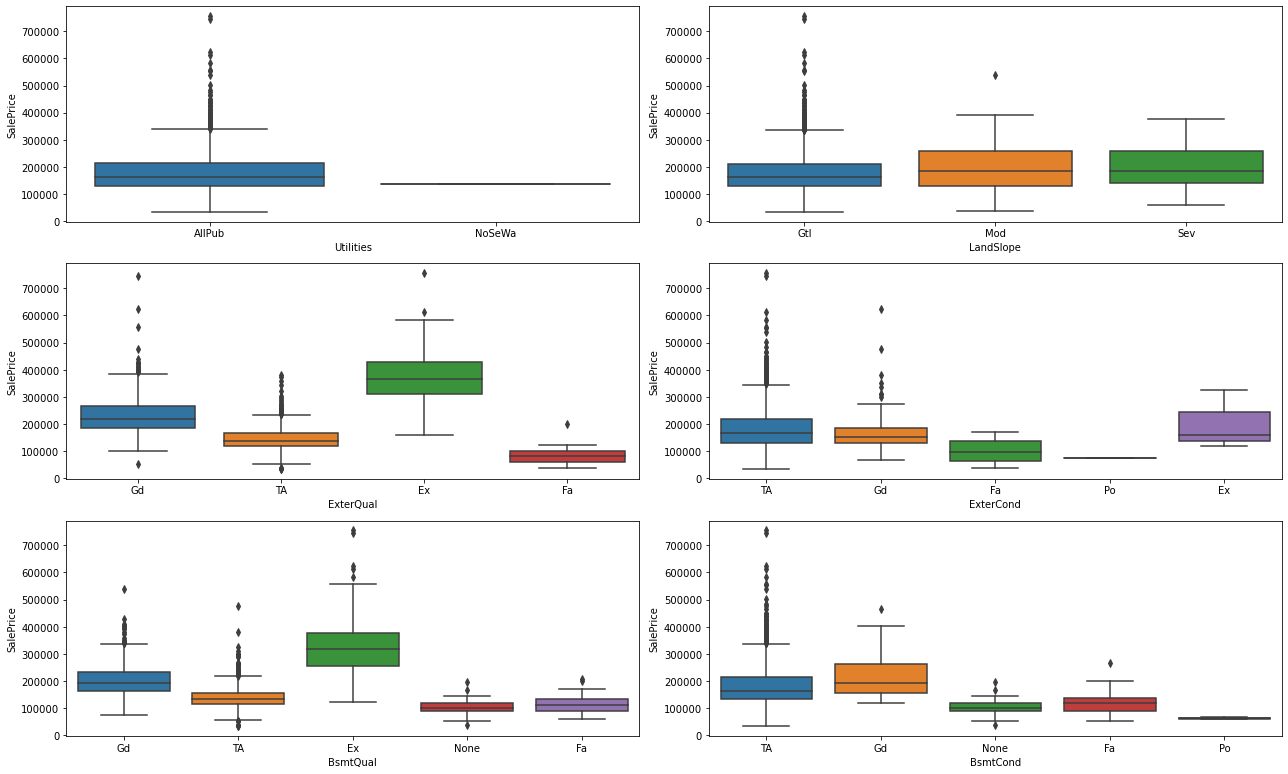

In [22]:

ordered_features = ['Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond']

draw_plot(ordered_features)

##### Observation 

Utilities : Almost all the house are intstalled with utilities

Landslope : Severe Landslope has the lowest price

ExtenalQual : Excellent Quality has the highest price well thats the fact

ExterCond : Poor External Condition sales price is very low as expected

BsmtQual : Excellent Basement quality has highest price

BsmtCond : Good Condition basement has the highest price


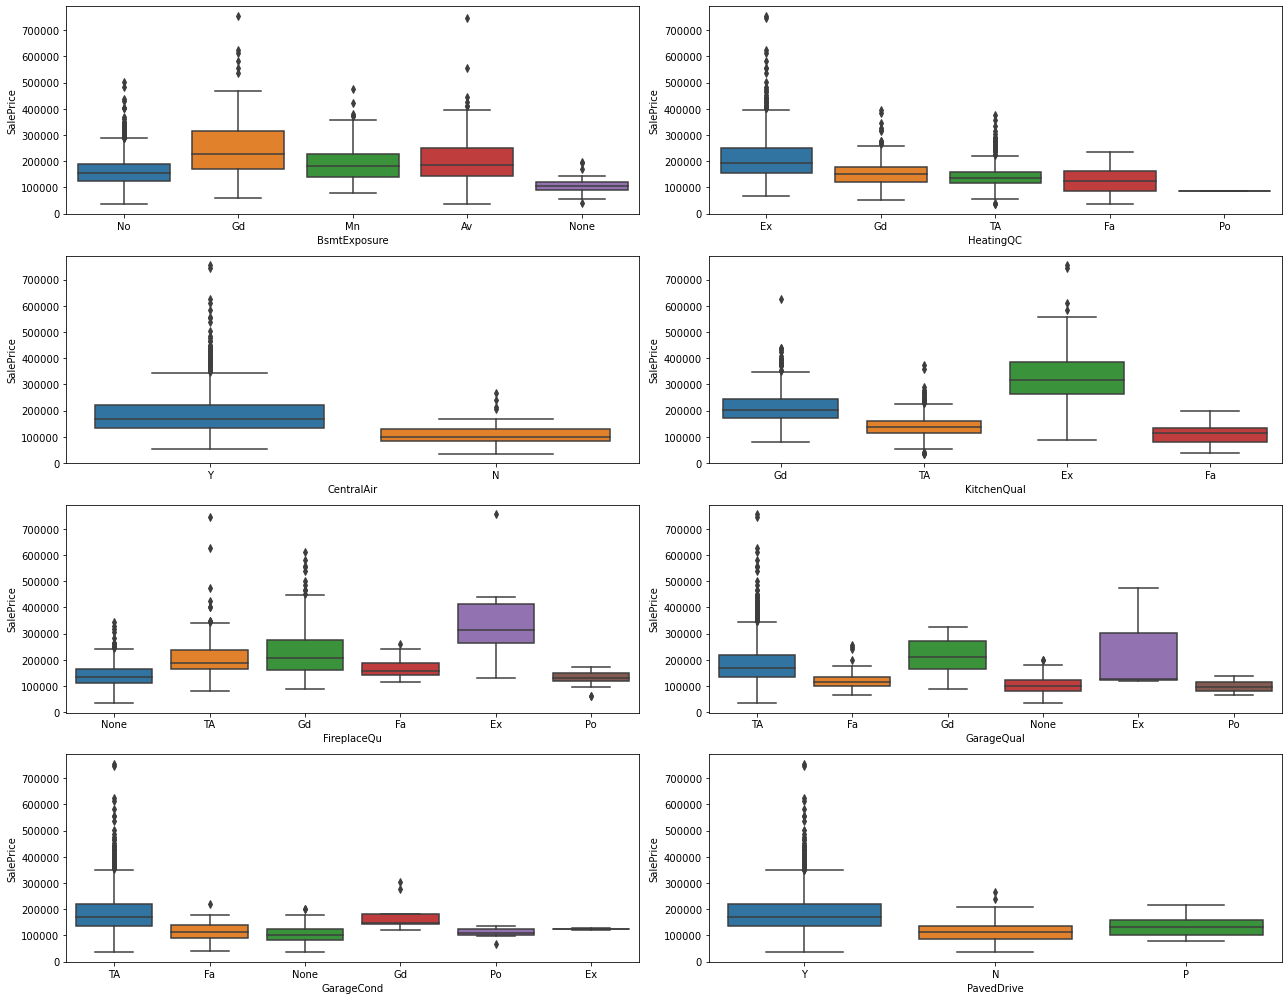

In [23]:
ordered_features = ['BsmtExposure', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageQual','GarageCond','PavedDrive']

draw_plot(ordered_features)

###### Observation

BsmtExposure : Good Basement exposure has the highest price
    
CentralAir : Central Air condiotioned has the highest price
    
FirePlaceQu: Excellent Fire Palce has the highest price 
    
GarageCond : Most sold house has the typical Garage condition
    
HeatingQC : Sales price is higher for Excellent HeatinQc
    
KitchenQual : Sales price is higher for Excellent KitchenQuality
    
GarageQual : Range of sales is higher in Typical and Good
    
    

### Encoding 

Lable encoding for ordered features

In [24]:
#Ordinal Encoding 
oe_Utilities = { 'AllPub' : 3,'NoSewr' :2, 'NoSeWa':1 , 'ELO' : 0  }
oe_slope = { 'Sev': 0 , 'Mod' : 1, 'Gtl' : 2 }
oe_qual={'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
oe_exposure = {'None':0,'No':1,'Mn':2,'Av':3,'Gd':4}
oe_conditioning = { 'N' : 0,'Y': 1 }
oe_garage_finish = { 'None' : 0 , 'Unf':1,'RFn':2 ,'Fin':3}
oe_paved = { 'N':0,'P':1 ,'Y':2}

In [25]:
df.Utilities=df.Utilities.map(oe_Utilities)
df.LandSlope=df.LandSlope.map(oe_slope)
df.ExterQual=df.ExterQual.map(oe_qual)
df.ExterCond=df.ExterCond.map(oe_qual)
df.BsmtQual=df.BsmtQual.map(oe_qual)
df.BsmtCond=df.BsmtCond.map(oe_qual)
df.BsmtExposure=df.BsmtExposure.map(oe_exposure)
df.HeatingQC=df.HeatingQC.map(oe_qual)
df.CentralAir=df.CentralAir.map(oe_conditioning)
df.KitchenQual=df.KitchenQual.map(oe_qual)
df.FireplaceQu=df.FireplaceQu.map(oe_qual)
df.GarageQual=df.GarageQual.map(oe_qual)
df.GarageCond=df.GarageCond.map(oe_qual)
df.PavedDrive=df.PavedDrive.map(oe_paved)



In [26]:
object_columns=df.select_dtypes('object')
object_columns.head()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,GarageType,GarageFinish,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,ALQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,ALQ,Unf,GasA,SBrkr,Typ,Detchd,Unf,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,None,None,WD,Normal


In [27]:
def draw_plot2(dataList):
    fig=plt.subplots(figsize=(18, 14))
    for i, data in enumerate(dataList):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot( df['SalePrice'],df[data])
        plt.tight_layout()

#### Analysing Unordered Features

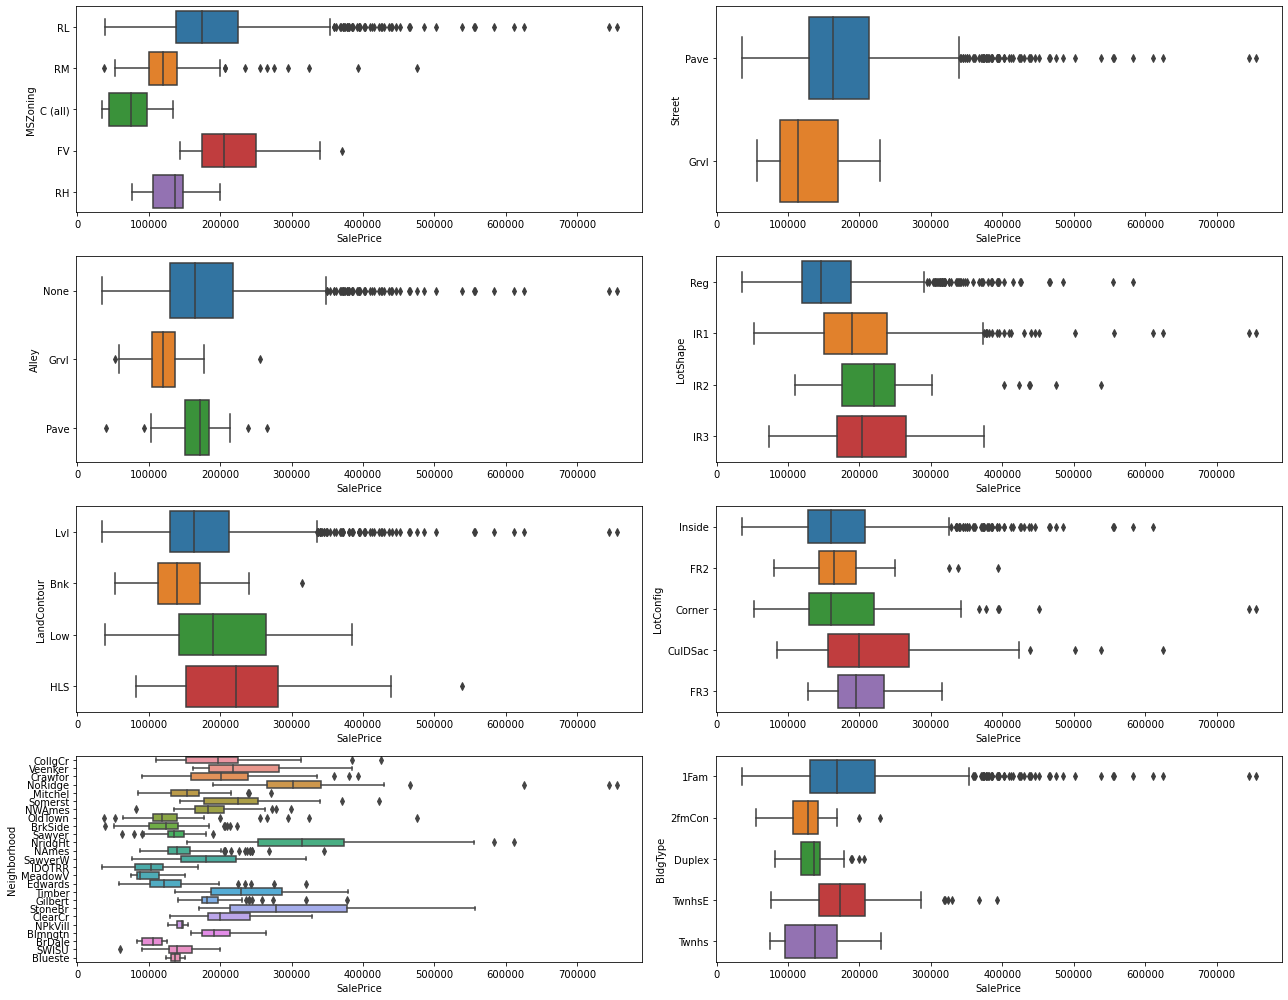

In [28]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig','Neighborhood','BldgType']

draw_plot2(unordered_features)

##### Obesrvation 

MSZoning : Floating Village Residential has the highest price range 

Alley :  No Alley Sales is higher

LandContour : Hillside - Significant slope from side to side has highest sales

Neighborhood : StoneBr and NridgHt has the higher price sales

Street : Paves Street sales is higher

LotShape : Regular shape has the lowest price sales

LotConfig : Inside lot House has more sales

BldgType : Single-family Detached has the highest sales    
    
    

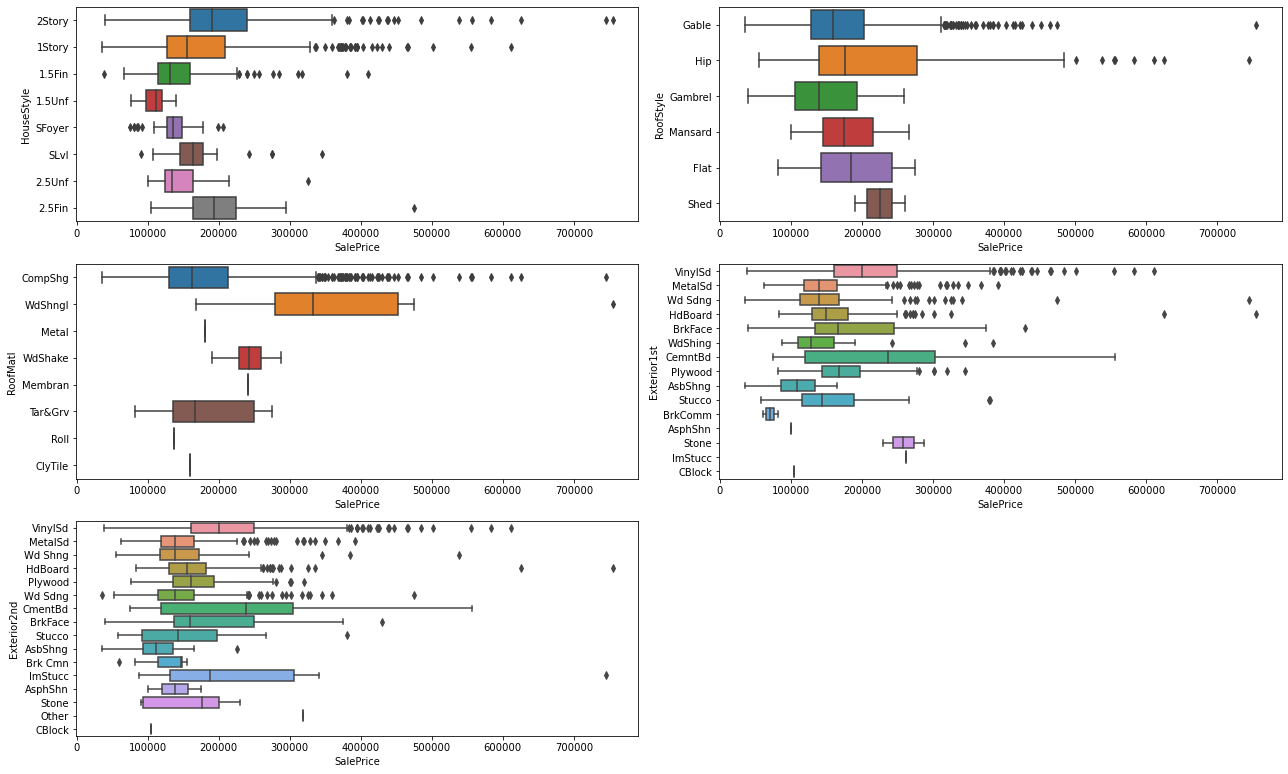

In [29]:
unordered_features = ['HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd']
draw_plot2(unordered_features)

##### Observation 

HouseStyle : 2 story and 2.5 story has the highest sale price

RoofMatl : cost of wood shingles is very higher

Exterior2nd : Cement Board & Imitation Stucco has the same price range

RoofStyle : Shed sales is very low

Exterior1st :  very less sales in Brick Common  

### Encoding Unordered Features

In [30]:
oh_df=pd.get_dummies(object_columns, drop_first=True)
oh_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,

In [31]:
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Utilities      1459 non-null   int64  
 5   LandSlope      1459 non-null   int64  
 6   OverallQual    1459 non-null   int64  
 7   OverallCond    1459 non-null   float64
 8   YearBuilt      1459 non-null   int64  
 9   YearRemodAdd   1459 non-null   int64  
 10  MasVnrArea     1459 non-null   float64
 11  ExterQual      1459 non-null   int64  
 12  ExterCond      1459 non-null   int64  
 13  BsmtQual       1459 non-null   int64  
 14  BsmtCond       1459 non-null   int64  
 15  BsmtExposure   1459 non-null   int64  
 16  BsmtFinSF1     1459 non-null   float64
 17  BsmtFinSF2     1459 non-null   int64  
 18  BsmtUnfS

In [32]:
frames = [df, oh_df]
  
df = pd.concat(frames, axis=1, join='inner')

In [33]:
# converting 'GarageYrBlt' from float to int
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [34]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,145

In [35]:
df.shape

(1459, 225)

In [36]:
df['AgeOfProp'] = (df['YrSold'] - df['YearBuilt'])
df['AgeOfProp'].head()

0     5
1    31
2     7
3    91
4     8
Name: AgeOfProp, dtype: int64

The Data is Cleaned

# EDA & Visualization

In [37]:
df = df.drop(['Id'],axis=1)
df.shape

(1459, 225)

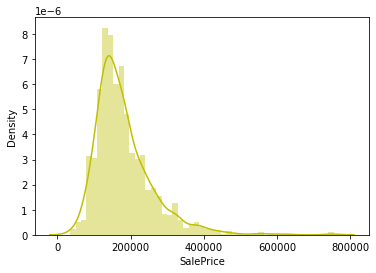

In [38]:
#SalesPrice is the target variable we can plot for normal distribution
plt.figure()
sns.distplot(df['SalePrice'],color='y')
plt.show()

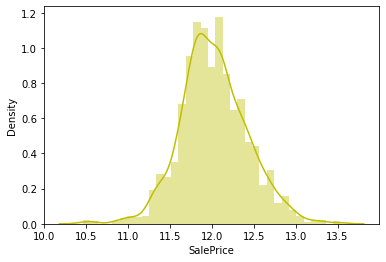

In [39]:
#the sales variable is right skewed we can do logrithimic trnasformation to fix
df['SalePrice'] = np.log(df['SalePrice'])
plt.figure()
sns.distplot(df['SalePrice'],color='y')
plt.show()

### Univaraite & Bivariate Analysis

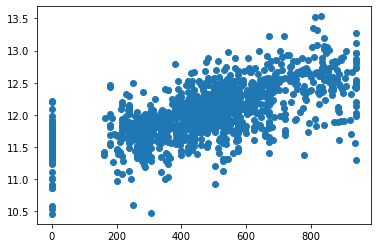

In [40]:
#analysing the GarageArea with SalesPrice
plt.scatter(df['GarageArea'],df.SalePrice)

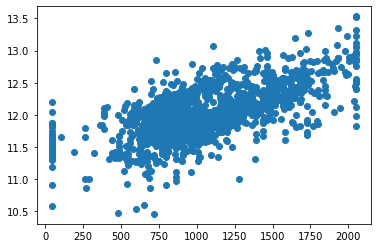

In [77]:

plt.scatter(df['TotalBsmtSF'],df.SalePrice)

Observation : There is a linear increase in the sales price when the basement area size increases.And like garage for a good sale basement should be 0 or above 400

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

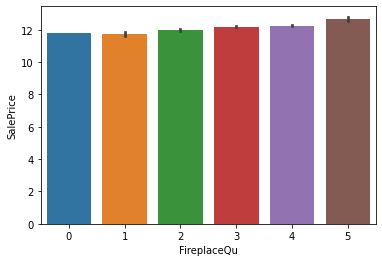

In [78]:

sns.barplot(df['FireplaceQu'],df.SalePrice)

Observation : FirePlaceQu has almost same same price range for all variations

<AxesSubplot:xlabel='Street_Pave', ylabel='SalePrice'>

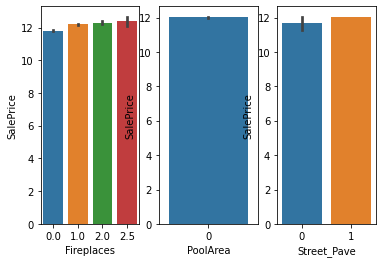

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.barplot(df['Fireplaces'],df.SalePrice, ax=ax1)
sns.barplot(df['PoolArea'],df.SalePrice, ax=ax2)
sns.barplot(df['Street_Pave'],df.SalePrice, ax=ax3)

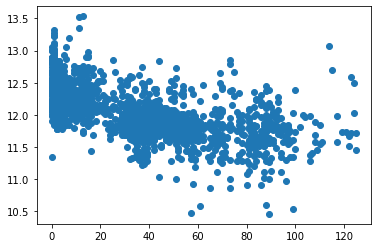

In [80]:
plt.scatter(df['AgeOfProp'],df.SalePrice)

### Data Preparation

In [81]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeOfProp
0,60,65.0,8450,3,2,7,5.0,2003,2003,196.0,4,3,4,3,1,706.0,0,150.0,856.0,5,1,856.0,854,0,1710.0,1.0,0,2,1,3.0,1,4,8,0.0,0,2003,2.0,548.0,3,3,2,0,61,0,0,0,0,0,2,2008,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,

In [82]:
# Putting response variable to y
y = df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [83]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

In [84]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (1021, 224)
X_test shape (438, 224)
y_train shape (1021,)
y_test shape (438,)


In [85]:
#checking the variables opt for scaling
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AgeOfProp'], dtype='object')

In [86]:
scale_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AgeOfProp']
X_train[scale_vars].shape

(1021, 51)

In [87]:
#Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])


In [88]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeOfProp
6,-0.920088,0.313879,0.098749,0.031311,0.232855,1.403861,-0.557191,1.105598,0.999809,0.691771,1.046991,-0.229154,1.734421,0.122162,1.274264,2.125452,0.0,-0.562983,1.590422,0.895522,0.258603,1.499585,-0.782151,0.0,0.404769,1.129562,0.0,0.808452,-0.758648,0.191691,0.0,0.733636,0.337777,0.633005,1.213175,1.074855,0.310773,0.802033,0.260983,0.254415,0.284330,1.388678,0.313945,0.0,0.0,0.0,0.0,0.0,0.607727,-0.618674,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [89]:
X_test[scale_vars].head()

,MSSubClass,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,AgeOfProp
666,0.161403,-0.035693,2.223181,0.031311,0.232855,-0.066233,-0.557191,-0.233733,-0.257578,0.152456,-0.68555,2.624093,0.585269,0.122162,-0.593681,-0.592031,0.0,-1.039971,-0.083183,-1.177785,0.258603,0.863973,1.300889,0.0,1.819319,-0.820197,0.0,0.808452,1.217320,0.191691,0.0,-0.767451,0.337777,0.633005,-0.448701,-0.540287,0.310773,0.607974,0.260983,0.254415,0.284330,-0.799175,2.522798,0.0,0.0,0.0,0.0,0.0,0.607727,-0.618674,0.205399
104,-0.108970,-0.035693,-0.551439,0.031311,0.232855,0.668814,-1.608746,-1.401355,-1.660049,2.355892,-0.68555,-3.082401,-0.563884,0.122162,-0.593681,-0.506966,0.0,0.592438,-0.035366,0.895522,0.258603,0.200606,0.565565,0.0,0.660460,-0.820197,0.0,-1.005679,1.217320,1.505226,0.0,-0.767451,0.337777,2.222915,0.659216,-1.120082,-1.036571,-1.119145,0.260983,0.254415,0.284330,-0.799175,-0.800255,0.0,0.0,0.0,0.0,0.0,-0.125712,-0.618674,1.371613
528,-0.649715,-0.676576,-0.176868,0.031311,0.232855,-1.536328,1.545921,-1.779115,0.854726,-0.682375,-0.68555,-0.229154,-0.563884,0.122162,0.340292,-0.221883,0.0,-0.880203,-1.323916,0.895522,0.258603,-1.523041,-0.782151,0.0,-1.840777,1.129562,0.0,-1.005679,-0.758648,-1.121844,0.0,-0.767451,-0.956296,-0.956905,-1.002660,0.080921,-2.383915,-2.283495,-4.083528,-4.074888,-3.892666,-0.799175,-0.800255,0.0,0.0,0.0,0.0,0.0,0.241008,-0.618674,1.748917
18,-0.920088,-0.210480,1.108134,0.031311,0.232855,-0.801281,-0.557191,1.105598,0.951448,-0.682375,-0.68555,-0.229154,-0.563884,0.122162,-0.593681,0.463235,0.0,-0.213347,0.150870,0.895522,0.258603,-0.110261,-0.782151,0.0,-0.791206,1.129562,0.0,-1.005679,1.217320,0.191691,0.0,0.733636,-0.309259,-0.956905,-1.002660,1.074855,0.310773,0.510945,0.260983,0.254415,0.284330,-0.799175,1.193577,0.0,0.0,0.0,0.0,0.0,-0.125712,0.137812,-1.098016
1151,-0.920088,2.207396,2.223181,0.031311,0.232855,-0.801281,-1.608746,-0.439784,-1.224799,0.292825,-0.68555,-0.229154,-0.563884,0.122162,-0.593681,-0.617321,0.0,1.689972,1.036748,-1.177785,0.258603,0.866749,-0.782151,0.0,-0.065373,-0.820197,0.0,-1.005679,1.217320,0.191691,0.0,-2.268539,-0.309259,2.222915,1.213175,-0.788770,0.310773,0.278075,0.260983,0.254415,0.284330,-0.799175,1.936377,0.0,0.0,0.0,0.0,0.0,1.707886,-1.375161,0.376901


In [90]:
#checking With Linear Regression
from sklearn.feature_selection import RFE
selected_cols = []

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 100)
rfe = rfe.fit(X_train, y_train)
    
rfe_ranking = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
    
for i in rfe_ranking:
        if i[1]:
            selected_cols.append(i[0])
print(selected_cols)

['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageCars', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Alley_None', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1Story', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl

In [91]:
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train[selected_cols])
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
print(lin_reg.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        21:06:46   Log-Likelihood:                 836.73
No. Observations:                1021   AIC:                            -1503.
Df Residuals:                     936   BIC:                            -1085.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.57

In [92]:
#Take Rfe selected columns
X_train_rfe = X_train[selected_cols]
X_test_rfe = X_test[selected_cols]

### Model Building : Lasso

In [93]:
# Applying Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso.fit(X_train_rfe, y_train)
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [94]:
lasso_model = model_cv.best_estimator_
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)
print("Lasso Alpha : ",model_cv.best_params_["alpha"])
print('R2 score - train : ',r2_score(y_train,y_train_pred))
print('R2 score - test : ',r2_score(y_test,y_test_pred))
print('RMSE - train : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE - test : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Lasso Alpha :  0.001
R2 score - train :  0.9110969625863999
R2 score - test :  0.872810754847083
RMSE - train :  0.11934386996978523
RMSE - test :  0.14176754394173333


#### Model Building : Ridge 

In [95]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

ridge.fit(X_train_rfe, y_train)
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [96]:
ridge_model = model_cv.best_estimator_
ridge_model.fit(X_train_rfe, y_train)
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)
print("Ridge Alpha : ",model_cv.best_params_["alpha"])
print('R2 score - train : ',r2_score(y_train,y_train_pred))
print('R2 score - test : ',r2_score(y_test,y_test_pred))
print('RMSE - train : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE - test : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Ridge Alpha :  6.0
R2 score - train :  0.9207845474859263
R2 score - test :  0.8724475663040967
RMSE - train :  0.11265403994404927
RMSE - test :  0.1419698080712243


#### Model CoEfficients Comparison 

In [97]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Lasso'] = lasso_model.coef_
model_coefficients['Ridge'] = ridge_model.coef_

pd.set_option('display.max_rows', None)
model_coefficients

,Lasso,Ridge
OverallQual,0.100636,0.089928
OverallCond,0.060804,0.059810
YearBuilt,0.043222,0.043949
BsmtFinSF2,0.000000,0.000000
BsmtUnfSF,-0.046884,-0.048215
TotalBsmtSF,0.093556,0.089220
1stFlrSF,0.041844,0.065940
2ndFlrSF,0.039073,0.057643
LowQualFinSF,0.000000,0.000000
GrLivArea,0.105044,0.081475


### MODEL CONCLUSION 

In [98]:
model_coefficients[['Lasso']].sort_values(by='Lasso', ascending=False).index[:5]

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'SaleType_New'], dtype='object')

## Conclusion

### Surprise Housing Neeed to check the following features those affecting the prices


#### GrLivArea: Above grade (ground) living area square feet
#### overallQual: Rates the overall material and finish of the house
#### TotalBsmtSF: Total square feet of basement area
#### Neighborhood: Physical locations within Ames city limits ie	Crawford 
#### SaleType: Type of sale ie New SaleType

### Add on Information : AgeOfProp is the feature which shows the age of property where the higher the age the price is low and vice versa

### Problem Statement Part II Question 1 Simulation

In [101]:
#As stated in the question we double the value of alpha for Lasso
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)
print("Lasso Model Double the Alpha")
print('R2 score Train : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score Test : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE Train : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE Test : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Lasso Model Double the Alpha
R2 score Train :  0.9031
R2 score Test :  0.8683
RMSE Train :  0.1246
RMSE Test :  0.1443


In [102]:
#As stated in the question we double the value of alpha for Ridge
ridge_model = Ridge(alpha=12.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Ridge Model Double the Alpha")
print('R2 score : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score  : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE  : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE  : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Ridge Model Double the Alpha
R2 score :  0.9176
R2 score  :  0.8715
RMSE  :  0.1149
RMSE  :  0.1425


In [103]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Lasso'] = lasso_model.coef_
model_coefficients['Ridge'] = ridge_model.coef_

pd.set_option('display.max_rows', None)
model_coefficients

,Lasso,Ridge
OverallQual,0.110457,0.093549
OverallCond,0.061740,0.060447
YearBuilt,0.000000,0.043645
BsmtFinSF2,0.000000,0.000000
BsmtUnfSF,-0.045402,-0.047465
TotalBsmtSF,0.096485,0.089301
1stFlrSF,0.015054,0.062935
2ndFlrSF,0.018797,0.055300
LowQualFinSF,0.000000,0.000000
GrLivArea,0.131758,0.084112


In [106]:
model_coefficients[['Lasso']].sort_values(by='Lasso', ascending=False).index[:5]

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'SaleType_New'], dtype='object')

In [107]:
model_coefficients[['Ridge']].sort_values(by='Ridge', ascending=False).index[:5]

Index(['OverallQual', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'SaleType_New', 'GrLivArea'], dtype='object')